# Bank Note Data Analysis and Model Building

## Exploratory Data Analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fastapi/BankNote_Authentication.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df.isnull().sum()

,0
variance,0
skewness,0
curtosis,0
entropy,0
class,0


In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
df.duplicated().sum()

np.int64(24)

In [12]:
# droping the null values
df.drop_duplicates(inplace=True)

In [13]:
# splitting the data into dependent and target variables
X = df.drop('class', axis = 1)
y = df['class']

In [14]:
X.shape, y.shape

((1348, 4), (1348,))

In [15]:
y.value_counts()

,count
class,
0,738
1,610


In [16]:
X.describe()

,variance,skewness,curtosis,entropy
count,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712
std,2.862906,5.868600,4.328365,2.085877
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.786650,-1.627000,-1.545600,-2.393100
50%,0.518735,2.334150,0.605495,-0.578890
75%,2.853250,6.796025,3.199800,0.403863
max,6.824800,12.951600,17.927400,2.449500


### Numerical vs Target Feature Plot

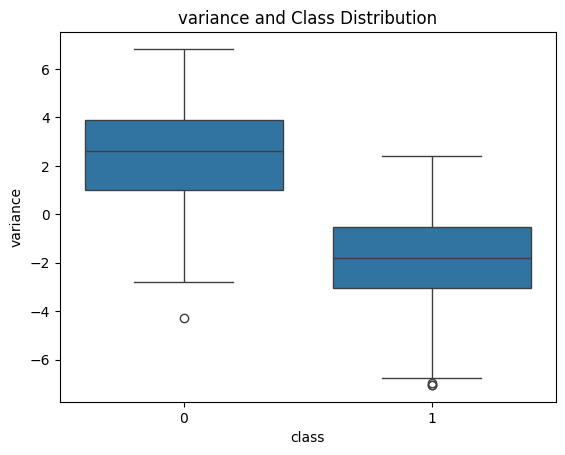

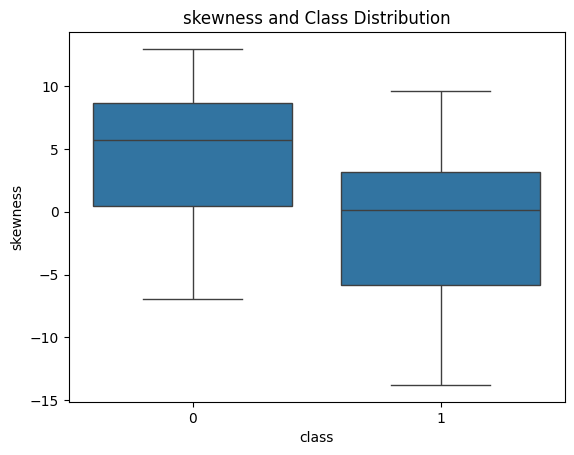

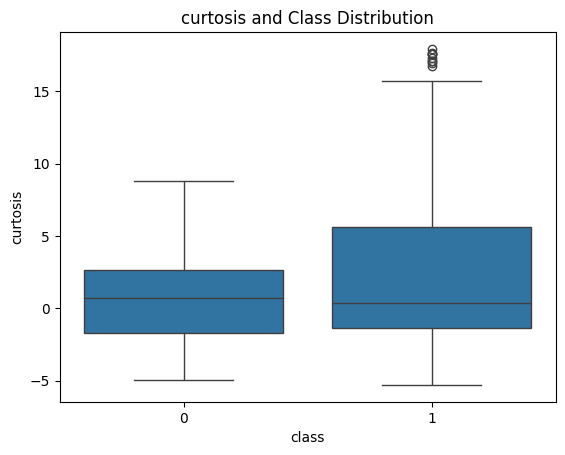

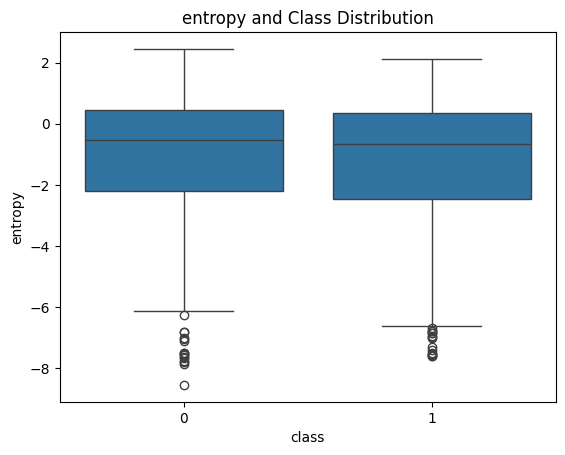

In [17]:
for col in X:
    sns.boxplot(x = y, y = col, data = df)
    plt.title(f"{col} and Class Distribution")
    plt.show()

## Model Building

In [18]:
# Train and Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)

X_train.shape, X_test.shape

((1011, 4), (337, 4))

In [19]:
# Model Building using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rff = RandomForestClassifier()

rff.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = rff.predict(X_test)
y_pred.shape, y_test.shape

((337,), (337,))

In [21]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)

score

0.9881305637982196

In [22]:
# creating a pickle file using serialization
import pickle
pickle_out = open("rf_model.pkl", "wb")
pickle.dump(rff, pickle_out)
pickle_out.close()


In [23]:
rff.predict([[-2,-3,0,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])